# Run HistoricalLetters model

This notebook shows how to run the `HistoricalLetters` model to create a `LetterLedger`. After running a model for a given number of steps, the ledger contains all send letters with information of sender, recipient, their geographical positions, the "topic" of the letter and the timestamp at which this letter was sent. 

In [25]:
from scicom.historicalletters.model import HistoricalLetters
import pandas as pd

The model is initialized with a number of agents (`population`) and we select that agents should have heterogenious activation probabilities (`useActivation`) and an initial social network (`useSocialNetwork`). Furthermore, two ranges are defined, as percentage of the mean average geographical distance between all agents. `moveRange` controls how many potential targets are visible for an agent, while `letterRange` defines the range for potential letter receivers.

In [26]:
%%time
model = HistoricalLetters(
    population=50,
    moveRange=0.01,
    letterRange=0.5,
    useActivation=True,
    useSocialNetwork=True
)

CPU times: user 738 ms, sys: 7.86 ms, total: 746 ms
Wall time: 744 ms


In [27]:
%%time
model.run(100)

CPU times: user 10.8 s, sys: 32.5 ms, total: 10.8 s
Wall time: 10.9 s


In [28]:
letterLedger = pd.DataFrame(
    model.letterLedger,
    columns=['sender', 'recipient', 'sender_loc', 'recipient_loc', 'topic', 'step']
)

In [29]:
letterLedger.shape

(324, 6)

## Considering individual agents

Each agent in the model can be accessed individually. The agents keep track of their personal topic evolution in the `topicLedger`.

In [31]:
agents = model.schedule.agents

In [32]:
a1 = agents[0]

In [33]:
a1.topicLedger[:3]

[(0.26939468679520084, 0.873311972869487, 0.25061833761660357),
 (0.26939468679520084, 0.873311972869487, 0.25061833761660357),
 (0.26939468679520084, 0.873311972869487, 0.25061833761660357)]

## Visualize letter network

Each sending of a letter creates an edge in the social network of the model. This network can be used to visualize the final state of the letter network. 

In [34]:
import networkx as nx

In [35]:
graph = model.G

In [36]:
sizes = nx.get_node_attributes(graph, 'numLettersReceived')

In [37]:
pos = nx.spring_layout(graph)

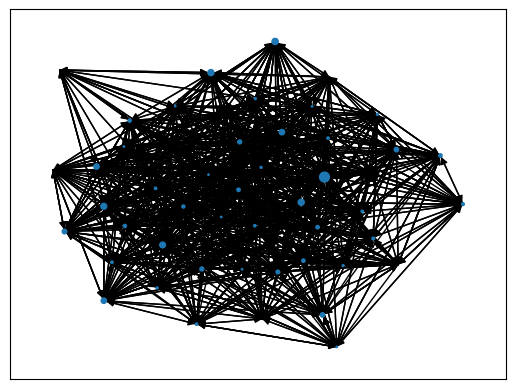

In [38]:
nx.draw_networkx(graph, pos=pos, node_size=list(sizes.values()), with_labels=False)

## Pruning

A first simple approach of pruning is removing nodes with lesser numbers of received letters.

In [39]:
len(graph.nodes())

50

In [40]:
lesserNodes = [x for x,y in sizes.items() if y < 10]

In [41]:
graph2 = graph.copy()

In [42]:
graph2.remove_nodes_from(lesserNodes)

In [46]:
len(graph2.nodes())

12

In [43]:
sizes2 = nx.get_node_attributes(graph2, 'numLettersReceived')
pos2 = nx.spring_layout(graph2)

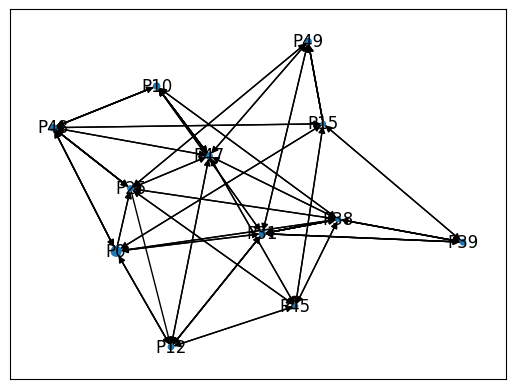

In [47]:
nx.draw_networkx(graph2,pos=pos2, node_size=list(sizes2.values()), with_labels=True)